**[VI1-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[VI1-02]**

Define the Gridworld class.

In [0]:
class Gridworld:
  def __init__(self, size=6, traps=[], alpha=0):
    self.size = size
    self.traps = traps
    self.alpha = alpha
    self.start = (0, 0)
    self.goal = (size-1, size-1)

    self.states = [(x, y) for x in range(size) for y in range(size)]
    self.actions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
    
    self.policy = {}
    for s in self.states:
      for a in self.actions:
        self.policy[(s, a)] = None

    self.value = {}
    for s in self.states:
      self.value[s] = 0
   
  def move(self, s, a):
    if s == self.goal:
      return [(1, 0, s)]      # Probability, Reward, Next state

    s_new = (s[0] + a[0], s[1] + a[1])

    if s_new not in self.states:
      # Give a penalty to a non-moving action.
      return [(1, -1, s)]     # Probability, Reward, Next state

    if s_new in self.traps:
      # Probability, Reward, Next state
      return [(self.alpha, -1, self.start), (1-self.alpha, -1, self.goal)]

    return [(1, -1, s_new)]   # Probability, Reward, Next state

**[VI1-03]**

Define a function to show state values.

In [0]:
  def show_values(world, subplot=None, title='Values'):
    if not subplot:
      fig = plt.figure(figsize=(world.size*0.8, world.size*0.8))
      subplot = fig.add_subplot(1, 1, 1)

    result = np.zeros([world.size, world.size])
    for (x, y) in world.states:
      if (x, y) in world.traps:
        result[y][x] = None
      else:
        result[y][x]  = world.value[(x, y)]
    sns.heatmap(result, square=True, cbar=False,
                annot=True, fmt='3.1f', cmap='coolwarm',
                ax=subplot).set_title(title)

**[VI1-04]**

Define a function to show a greedy policy.

In [0]:
def show_policy(world, title='Policy'):
  rotation = {(-1, 0): 180, (0, -1): 90, (1, 0): 0, (0, 1): 270}
  fig = plt.figure(figsize=(world.size*0.75, world.size*0.75))
  fig.subplots_adjust(wspace=0, hspace=0, top=0.92)
  fig.suptitle(title)

  c = 0
  for y in range(world.size):
    for x in range(world.size):
      c += 1
      subplot = fig.add_subplot(world.size, world.size, c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      if (x, y) in world.traps or (x, y) == world.goal:
        direction = None
      else:
        for a in world.actions:
          if world.policy[((x, y), a)] == 1:
            direction = rotation[a]
      if direction != None:
        bbox_props = dict(boxstyle='rarrow', fc='gray')
        subplot.text(0.5, 0.5, '     ', bbox=bbox_props, size=8,
                     ha='center', va='center', rotation=direction)

**[VI1-05]**

Define a function to update the greedy policy for a spedific state.

In [0]:
def policy_update(world, s, gamma=1):
  q_max = -10**10
  a_best = None
  for a in world.actions:
    results = world.move(s, a)
    q = 0
    for p, r, s_new in results:
      q += p * (r + gamma * world.value[s_new])
    if q > q_max:
      q_max = q
      a_best = a

  for a in world.actions:
    world.policy[(s, a)] = 0
  world.policy[(s, a_best)] = 1
  
  return q_max

**[VI1-06]**

Define a function to apply the value iteration algorithm.

In [0]:
def value_iteration(world, delta=0.01):
  while True:
    delta_max = 0
    print('.', end='')
    for s in world.states:
      v_new = policy_update(world, s)  # Policy update
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new           # Value update

    if delta_max < delta:
      print('\n')
      break 

**[VI1-07]**

Define a gridworld (α=1.0) and apply the value iteration algorithm.

...........



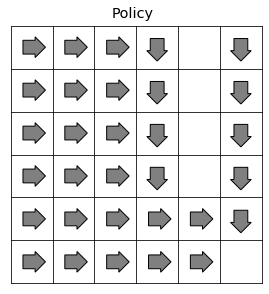

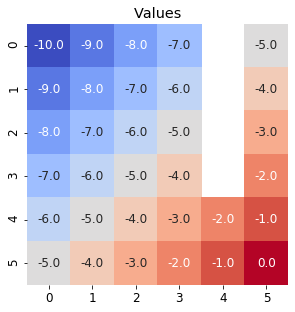

In [0]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=1.0)
value_iteration(world)
show_policy(world)
show_values(world)

**[VI1-08]**

Define a gridworld (α=0.0) and apply the value iteration algorithm.

......



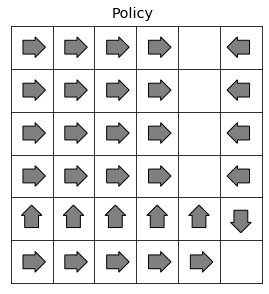

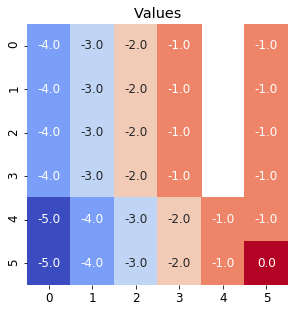

In [0]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.0)
value_iteration(world)
show_policy(world)
show_values(world)

**[VI1-09]**

Define a gridworld (α=0.5) and apply the value iteration algorithm.

........................



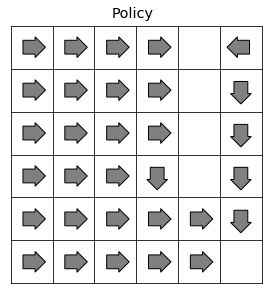

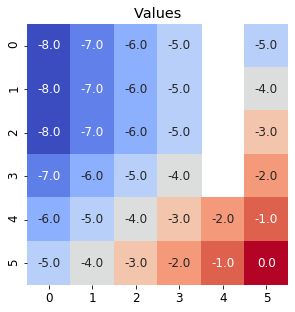

In [0]:
world = Gridworld(size=6, traps=[(4, y) for y in range(4)], alpha=0.5)
value_iteration(world)
show_policy(world)
show_values(world)